# Método de Diferencias Finitas en el Dominio del Tiempo

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [7]:
a = 1e-6
c = 3e8
accuracyY = 10
dy = a/accuracyY

dt = 1/c/np.sqrt(1/dy**2)

eps1 = 13
eps2 = 1

l1 = 0.5
l2 = 1-l1

tMax = 2e8
numK = 0

dt1 = c*dt/dy/eps1
dt2 = c*dt/dy/eps2

C:\Users\Dell\AppData\Local\Temp\ipykernel_14352\1289310066.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  Ez[int(1*accuracyY/5)] += np.exp(-(t-0.5e-12)**2/1e-25) * 5 * np.exp(1j*5e15*t)
C:\Users\Dell\AppData\Local\Temp\ipykernel_14352\1289310066.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  Hx[0] -= dt1*eps1*(Ez[0] - Ez[-1]*rotate)
C:\Users\Dell\AppData\Local\Temp\ipykernel_14352\1289310066.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  Ez[-1] -= dt2*(Hx[0]/rotate - Hx[-1])


IndexError: list index out of range

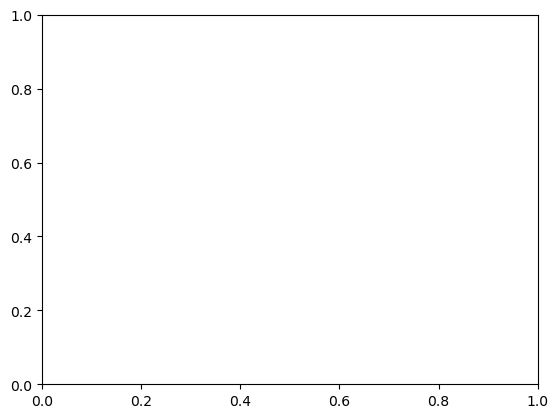

In [9]:
wEigen = []

# Bucle principal para K
for K in np.arange(0, (1/20)*(np.pi/a), np.pi/a):
    numK += 1
    Ez = np.zeros(accuracyY)
    Hx = np.zeros(accuracyY)
    rotate = np.exp(1j * K * a)
    Time = []

    # Bucle para calcular la variación del campo en el tiempo
    for t in np.arange(0, tMax*dt, dt):
        Ez[int(1*accuracyY/5)] += np.exp(-(t-0.5e-12)**2/1e-25) * 5 * np.exp(1j*5e15*t)
        Hx[0] -= dt1*eps1*(Ez[0] - Ez[-1]*rotate)

        # Calcular componente magnético del campo
        for coord in range(1, accuracyY):
            if coord < accuracyY*l1:
                Hx[coord] -= dt1*eps1*(Ez[coord] - Ez[coord-1])
            else:
                Hx[coord] -= dt2*eps2*(Ez[coord] - Ez[coord-1])

        # Calcular componente eléctrico del campo
        for coord in range(accuracyY-1):
            if coord < accuracyY*l1:
                Ez[coord] -= dt1*(Hx[coord+1] - Hx[coord])
            else:
                Ez[coord] -= dt2*(Hx[coord+1] - Hx[coord])

        # Condiciones de contorno para el campo eléctrico
        Ez[-1] -= dt2*(Hx[0]/rotate - Hx[-1])
        Time.append(Ez[int(2*accuracyY/5)])

    # Obtener imagen de Fourier de la respuesta de pulso dependiente del tiempo
    fourier = np.abs(np.fft.fft(Time))
    f = 2*np.pi/dt * np.arange(len(fourier)) / len(Time)
    wCount = 1
    wEigenRow = []

    # Analizar el espectro de la respuesta de pulso
    if fourier[0]/fourier[1] > 1.0001:
        wEigenRow.append(f[0])
        wCount += 1

    # Procesar otros elementos del array fourier
    for u in range(1, len(fourier)-1):
        if fourier[u]/fourier[u-1] > 1.01 and fourier[u]/fourier[u+1] > 1.01:
            wEigenRow.append(f[u])
            wCount += 1

    wEigen.append(wEigenRow)

    # Mostrar los estados propios
    plt.figure()
    ax = plt.gca()
    if wCount-1 >= 16:
        plt.plot(np.ones(16)*K*a/np.pi, np.abs(wEigen[numK-1][:16])*a/(2*c), 'o', linewidth=3)
    else:
        plt.plot(np.ones(wCount-1)*K*a/np.pi, np.abs(wEigen[numK-1])*a/(2*c), 'o', linewidth=3)

    # Marcar los ejes
    plt.ylim([0, 0.6])
    plt.xlim([-1, 1])
    plt.xlabel('ka/2π', fontsize=20)
    plt.ylabel('ωa / 2πc', fontsize=20)
    plt.draw()
    plt.pause(0.001)  # Necesario para actualizar la gráfica

# Mostrar la gráfica final
plt.show()
